<a href="https://colab.research.google.com/github/javohir-ergashboyev/DL-projects/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import fastai
import torch
import numpy as np

In [1]:
from fastai.vision.all import *
path=untar_data(URLs.CAMVID_TINY)
path


Path('/root/.fastai/data/camvid_tiny')

In [2]:
!ls /root/.fastai/data/camvid_tiny

codes.txt  images  labels


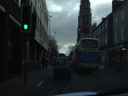

In [5]:
img=PILImage.create('/root/.fastai/data/camvid_tiny/images/0001TP_006750.png')
img

In [19]:
def get_label(file):
  return path/f'labels/{file.stem}_P{file.suffix}'

dls=SegmentationDataLoaders.from_label_func(path, bs=8,fnames=get_image_files(path/'images'),
                                            label_func=get_label,
                                            codes=np.loadtxt(path/'codes.txt', dtype=str))
learn=unet_learner(dls, resnet34)
learn.fine_tune(15)

epoch,train_loss,valid_loss,time
0,2.725874,3.218649,00:01


epoch,train_loss,valid_loss,time
0,2.134808,1.955289,00:01
1,1.801531,1.593049,00:01
2,1.590473,1.326558,00:01
3,1.451383,1.201695,00:01
4,1.336202,1.229575,00:01
5,1.225428,1.063413,00:01
6,1.114461,0.983147,00:01
7,1.010082,0.947194,00:01
8,0.920497,0.947932,00:01
9,0.842524,0.909116,00:01


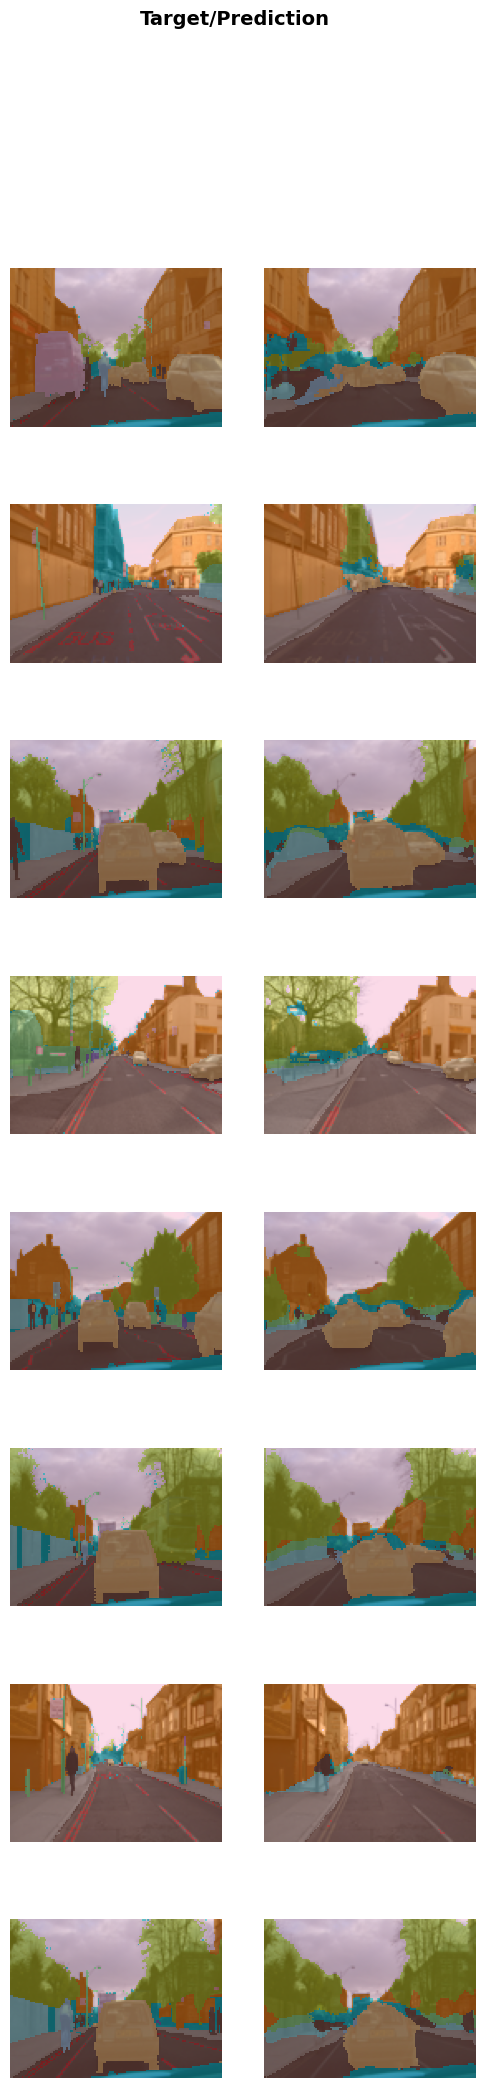

In [20]:
learn.show_results(1, max_n=10)